# TSP env test

In [1]:
from xyq_env_tsp import TSPProblem
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
# build tsp10 env
graph_size = 10
seed = 9527
tsp_env = TSPProblem(graph_size, seed)

In [17]:
# generate and save a dataset for testing
filename = tsp_env.generate_test_dataset(dataset_size=1000)

Generate test dataset at: xyq_test_dataset/tsp10_1000_seed9527.pkl


In [18]:
# load testing dataset
test_dataset = tsp_env.load_test_dataset(filename)
print(test_dataset.shape, test_dataset.dtype)

(1000, 10, 2) float64


----

Generate a batch of data for training, for (Kool 2019), we need 100 * 2500 batchs with batch size 512

In [19]:
batch_size = 5
batch_data = tsp_env.generate_tsp_data(batch_size)
print(batch_data.shape, batch_data.dtype)
batch_data[0:1]

(5, 10, 2) float64


array([[[0.76648211, 0.57981746],
        [0.52333235, 0.10878016],
        [0.29689268, 0.04460644],
        [0.79640665, 0.56447193],
        [0.97087118, 0.5572619 ],
        [0.5133927 , 0.05504145],
        [0.11594761, 0.50120897],
        [0.18244186, 0.84251784],
        [0.62165977, 0.76590216],
        [0.78632719, 0.51546295]]])

----
Suppose we have got the solution indices from the solver, its shape should be (batch_size, graph_size). Now let's compute the cost:

In [34]:
selected_idxs = np.stack([np.arange(10)] * batch_size, axis=0)
selected_idxs.shape

(5, 10)

In [37]:
# the shape of costs is (batch_size,)
costs = tsp_env.compute_cost(batch_data, selected_idxs)
print(costs)

[4.09852804 5.83763428 5.81127558 5.27902715 6.27363899]


---

Now let's visualize the route. Here we limit the batch_size as 1

(1, 10, 2)


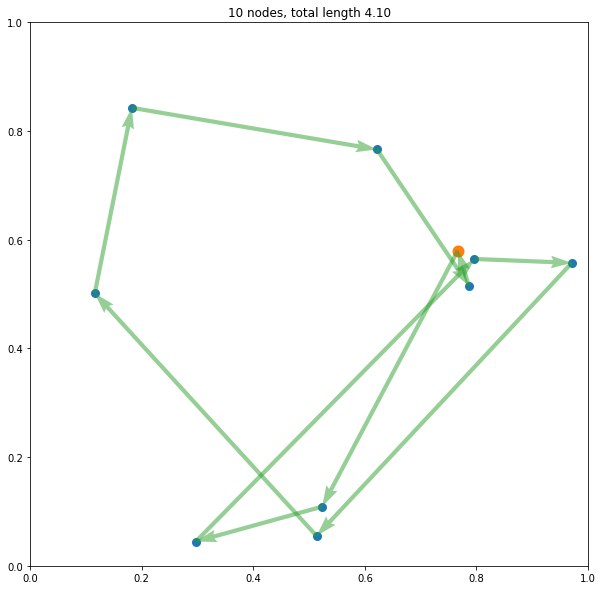

-----


In [43]:
i=0 # for i in range(10):
curr_data = batch_data[i:i+1] # keep the first dim
curr_idxs = selected_idxs[i:i+1]
print(curr_data.shape)
tsp_env.plot_tsp(curr_data, curr_idxs, savepath=None)
print("-----")

[[[0.05 0.6 ]
  [0.15 0.7 ]
  [0.25 0.8 ]
  [0.35 0.9 ]
  [0.45 0.95]
  [0.55 0.9 ]
  [0.65 0.8 ]
  [0.75 0.7 ]
  [0.85 0.6 ]
  [0.95 0.5 ]]]
[[0 1 2 3 4 5 6 7 8 9]]


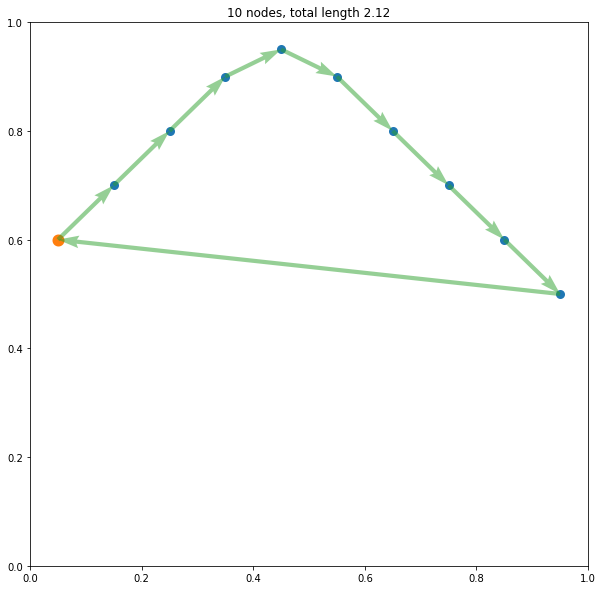

In [65]:
input_data = np.stack([np.arange(2,12) / 10. - 0.15, 
                       np.array([0.6,0.7,0.8,0.9,0.95,0.9,0.8,0.7,0.6,0.5])], axis=1)[None,:]
curr_idxs = selected_idxs[0:1]
print(input_data)
print(curr_idxs)
tsp_env.plot_tsp(input_data, curr_idxs, savepath="xyq_vis/test.png")